In [3]:
import tensorflow

In [4]:
import torch
import tensorboard

In [5]:
import numpy
import sklearn.metrics

In [6]:
from IPython.display import Image

In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14992, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 14992 (delta 0), reused 1 (delta 0), pack-reused 14989
Receiving objects: 100% (14992/14992), 14.01 MiB | 4.16 MiB/s, done.
Resolving deltas: 100% (10302/10302), done.


In [7]:
%cd yolov5

/home/ave0235/Downloads/Neural Foundry/yolov5


In [8]:
pwd

'/home/ave0235/Downloads/Neural Foundry/yolov5'

In [7]:
!pip install -r requirements.txt

In [ ]:
# # Create dataset.yaml
# This file contains information required by YOLO to train the model on the custom data.

# This is how dataset.yaml file look like.

# # train and val data
# train: ../dataset/images/train/
# val: ../dataset/images/validation/

# # number of classes
# nc: 1

# # class names
# names: ['T-shirt']

In [14]:
# model training
# At the end of the training, two files should be saved in yolov5/runs/train/exp2/weights: last.pt and best.pt. We’ll use best.pt.

!python3 train.py --img 400 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=400, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/home/ave0235/Downloads/Neural': No such file or directory
YOLOv5 🚀 2023-1-17 Python-3.8.10 torch-1.13.1+cu117 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.

      28/29         0G    0.01314   0.007146          0         20        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        135        123      0.999          1      0.995      0.968

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      29/29         0G    0.01136   0.007124          0         29        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        135        123      0.998          1      0.995      0.969

30 epochs completed in 1.169 hours.
Optimizer stripped from runs/train/exp2/weights/last.pt, 14.4MB
Optimizer stripped from runs/train/exp2/weights/best.pt, 14.4MB

Validating runs/train/exp2/weights/best.pt...
Fusing layers... 
Model summary: 166 layers, 7053910 parameters, 0 gradients
                 Class     Images  Instances          P          R      mAP50   
                   all        135        123     

In [9]:
%load_ext tensorboard
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 164499), started 7:17:30 ago. (Use '!kill 164499' to kill it.)

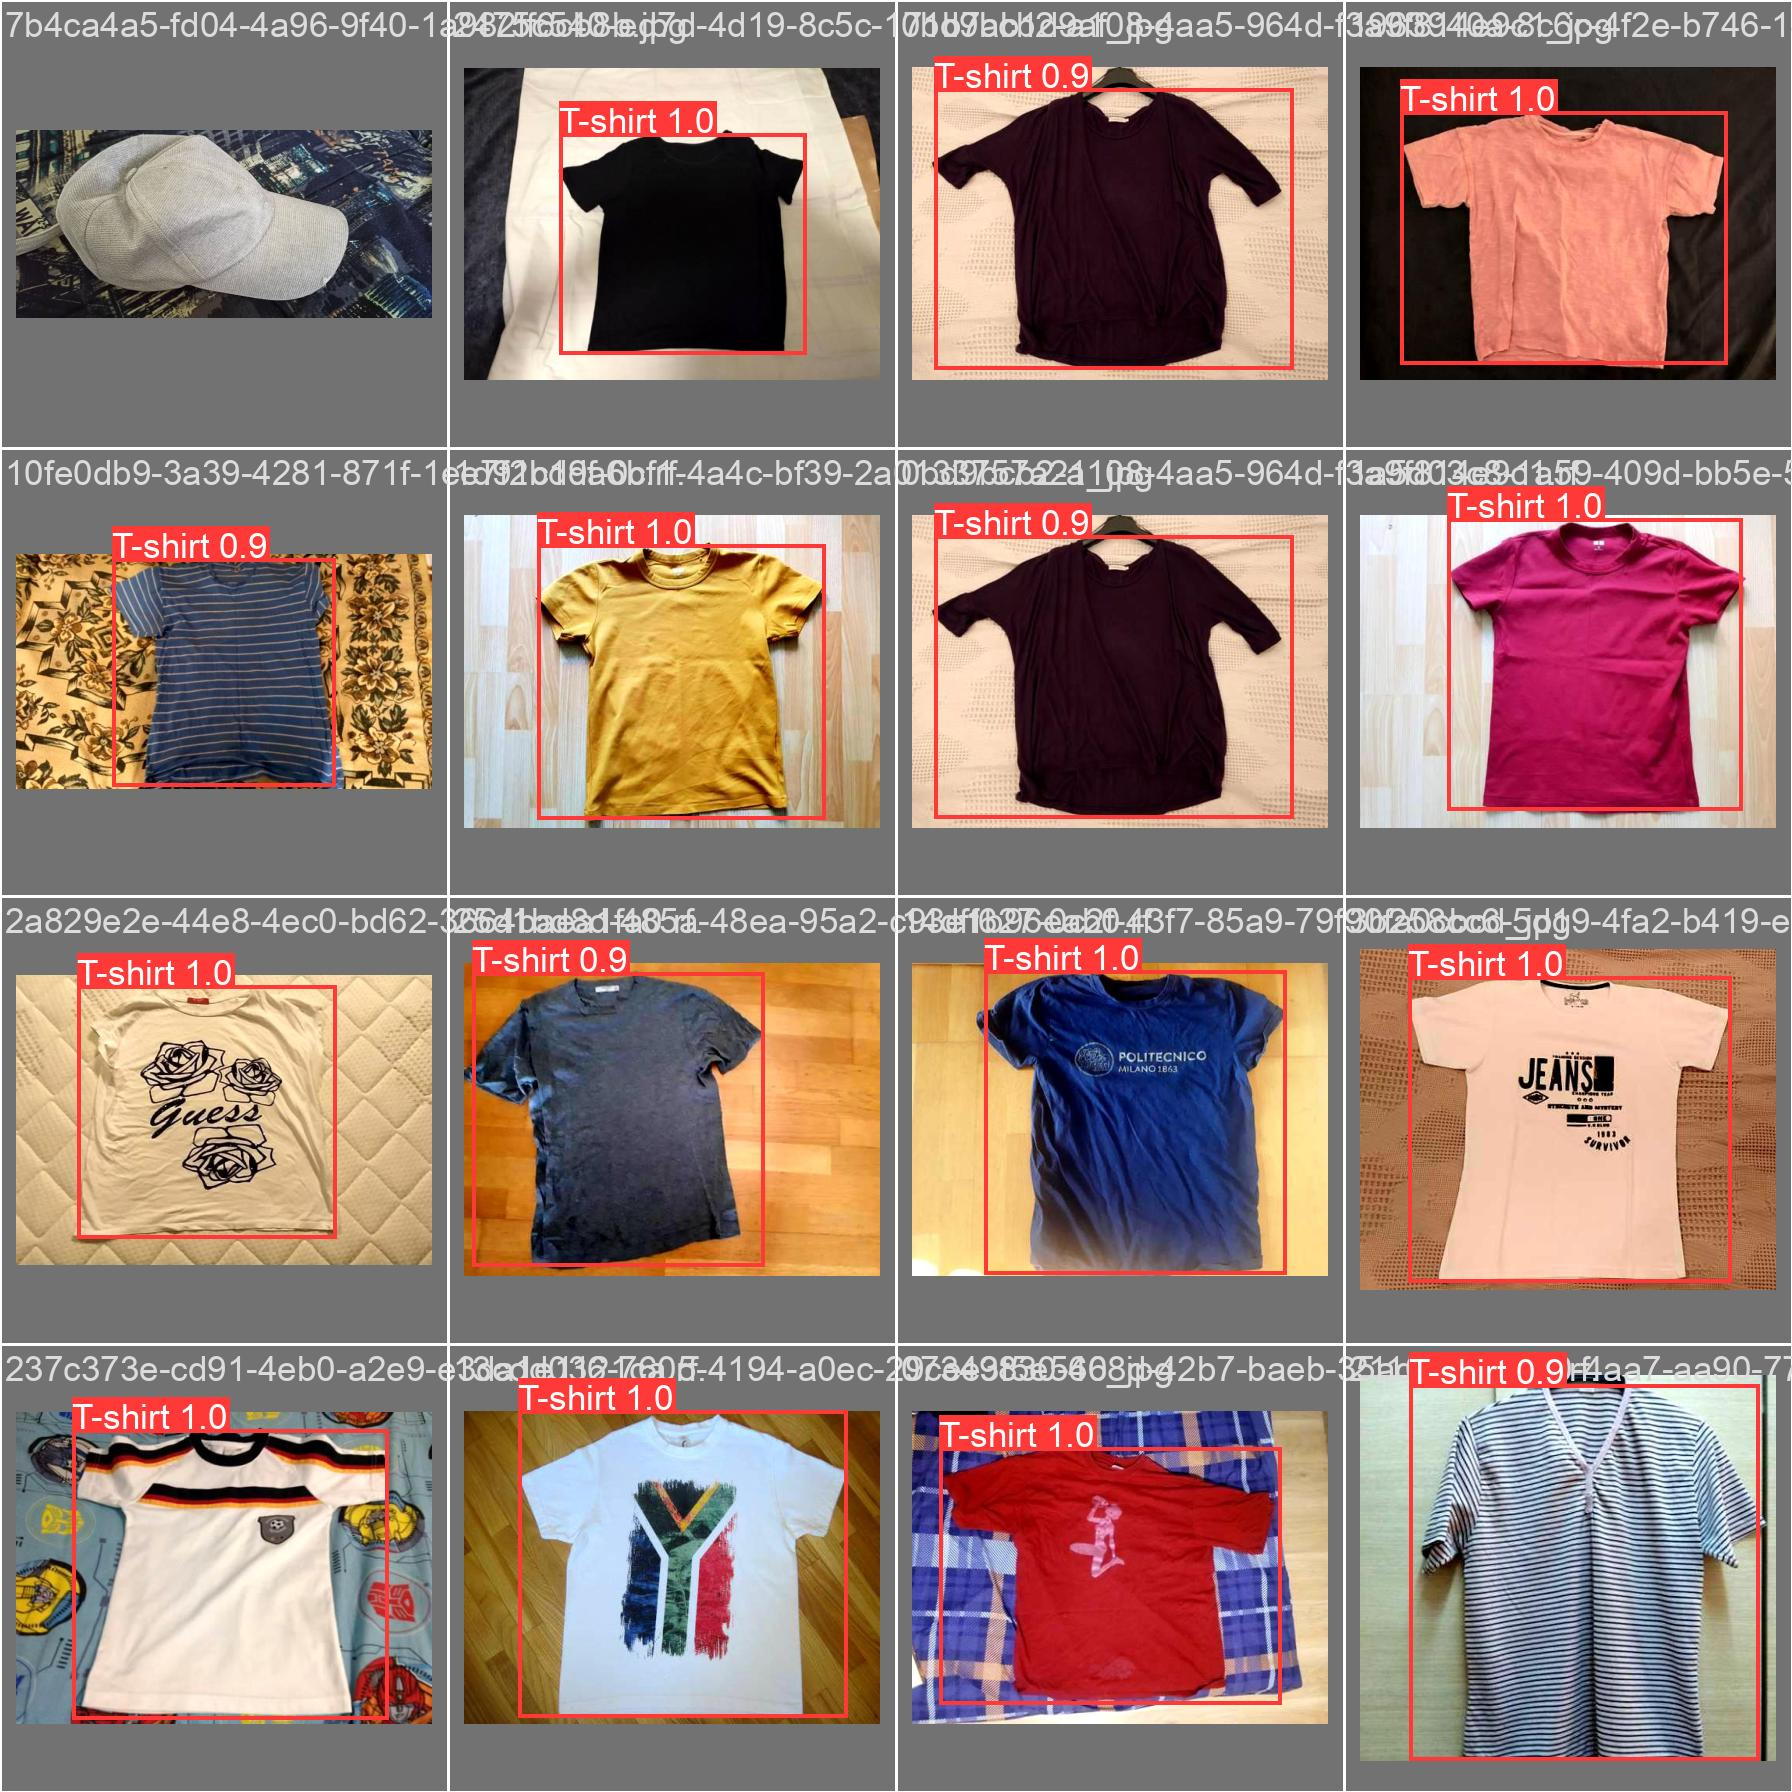

In [10]:
#plot a validation batch obtained during training and inspect the confidence score of each label

Image(filename='runs/train/exp2/val_batch0_pred.jpg', width=1000)

In [11]:
#model testing
#Implementing detect.py script with best.pt weights. The results will be saved to runs/detect/exp9 and labels to runs/detect/exp9/labels, varies path based on number of times run detect.py 
!python3 detect.py --source runs/train/exp2/test2/ --weights best.pt --save-conf --save-txt

detect: weights=['best.pt'], source=runs/train/exp2/test2/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/home/ave0235/Downloads/Neural': No such file or directory
YOLOv5 🚀 2023-1-17 Python-3.8.10 torch-1.13.1+cu117 CPU

Fusing layers... 
Model summary: 166 layers, 7053910 parameters, 0 gradients
image 1/1 /home/ave0235/Downloads/Neural Foundry/yolov5/runs/train/exp2/test2/2cc6e505-1a89-42e0-8177-017118117027.jpg: 640x480 1 T-shirt, 273.9ms
Speed: 1.5ms pre-process, 273.9ms inference, 2.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels


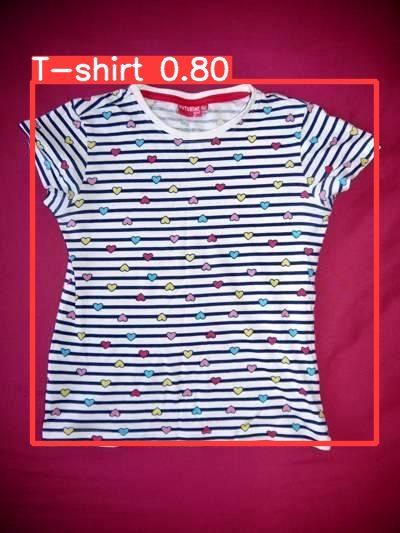

In [31]:
#predicted test sample by custom detection model
Image(filename='runs/detect/exp9/0c42c400-2c26-471f-93a9-40d00df87e6c.rf.93c77950fe1359ca4b689ab0a71648c0.jpg', width=500)



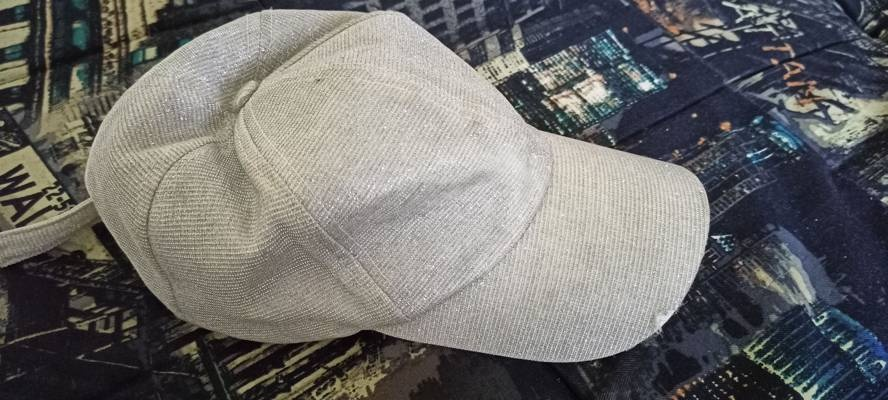

In [32]:
#predicted test sample by custom detection model
Image(filename='runs/detect/exp9/7b4ca4a5-fd04-4a96-9f40-1a982ff6cb8b.jpg', width=500)

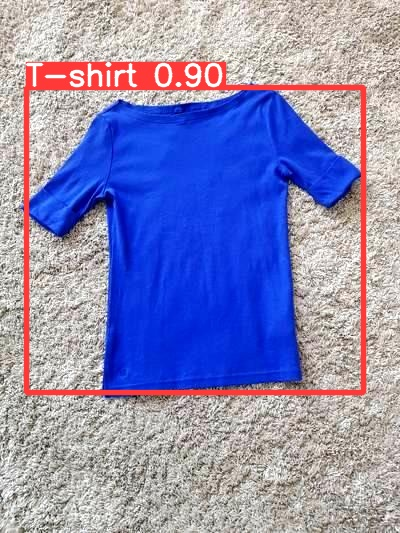

In [34]:
#predicted test sample by custom detection model
Image(filename='runs/detect/exp9/13cbd566-89c1-4089-9e35-afa221d99b12.rf.4e64b5a42c7342f29ad577d552b723d8.jpg', width=500)

In [17]:
#preparing ground truth labels , predicted labels for calculating Average Precision, IOU, precision-Recall Curve.


import os

def read_labels(dir_path):
    inputs = []
    for file_name in os.listdir(dir_path):
        # check for .txt file extension
        if file_name.endswith('.txt'):
            with open(dir_path + file_name, 'r') as f:
                lines = f.readlines()
                if len(lines) == 1:
                    class_id, x1, y1, w, h = map(float, lines[0].strip().split())
                    gt_box = [x1, y1, w, h]
                    inputs.append((file_name, {'gt_box': gt_box}))
    return inputs

def add_prediction(inputs, dir_path):
    for i in range(len(inputs)):
        inputs[i][1]['pred_box'] = None
        inputs[i][1]['pred_score'] = None
    # read predicted labels
    for file_name in os.listdir(dir_path):
        # check for .txt file extension
        if file_name.endswith('.txt'):
            with open(dir_path + file_name, 'r') as f:
                lines = f.readlines()
                if len(lines) == 1:
                    class_id, x1, y1, w, h, score = map(float, lines[0].strip().split())
                    pred_box = [x1, y1, w, h]
                    for i in range(len(inputs)):
                        if inputs[i][0] == file_name:
                            inputs[i][1]['pred_box'] = pred_box
                            inputs[i][1]['pred_score'] = score
    return inputs

ground_truth_path = '/home/ave0235/Downloads/Neural Foundry/dataset/labels/validation/'
predicted_path = '/home/ave0235/Downloads/Neural Foundry/yolov5/runs/detect/exp9/labels/'
inputs = read_labels(ground_truth_path)
inputs = add_prediction(inputs, predicted_path)


In [18]:
# Model Evaluation
# calculating Intersection Over Union

def intersection_over_union(gt_box, pred_box):
    if gt_box and pred_box:
        inter_box_top_left = [max(gt_box[0], pred_box[0]), max(gt_box[1], pred_box[1])]
        inter_box_bottom_right = [min(gt_box[0]+gt_box[2], pred_box[0]+pred_box[2]), min(gt_box[1]+gt_box[3], pred_box[1]+pred_box[3])]

        inter_box_w = inter_box_bottom_right[0] - inter_box_top_left[0]
        inter_box_h = inter_box_bottom_right[1] - inter_box_top_left[1]

        intersection = inter_box_w * inter_box_h
        union = gt_box[2] * gt_box[3] + pred_box[2] * pred_box[3] - intersection
        return intersection / union
    return 0


In [19]:
# Model Evaluation
# calculating precision & recall
def precision_recall_curve(y_true, iou_scores, iou_thresholds):
    precisions = []
    recalls = []

    for iou_threshold in iou_thresholds:
        y_pred = [0 if iou_score >= iou_threshold else -1 for iou_score in iou_scores]

        precision = sklearn.metrics.precision_score(y_true=y_true, y_pred=y_pred, pos_label=0)
        recall = sklearn.metrics.recall_score(y_true=y_true, y_pred=y_pred, pos_label=0)

        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls



In [22]:
pred_box = [x[1]['pred_box'] for x in inputs]
pred_scores = [x[1]['pred_score'] for x in inputs]
threshold = 0.5  ## This threshold can be varied
# y_pred = [0 if score >= threshold else -1 for score in pred_scores]
y_pred = [0 if score and score >= threshold else -1 for score in pred_scores]



gt_box = [x[1]['gt_box'] for x in inputs]
y_true = [0 if x else -1 for x in gt_box]


iou_scores = []
for entry in inputs:
    iou_scores.append(intersection_over_union(entry[1]['gt_box'], entry[1]['pred_box']))


iou_thresholds = numpy.arange(start=0.3, stop=1, step=0.05)

# print(iou_scores)
precisions, recalls = precision_recall_curve(y_true, iou_scores, iou_thresholds)

precisions.append(1)
recalls.append(0)

precisions = numpy.array(precisions)
recalls = numpy.array(recalls)

AP = numpy.sum((recalls[:-1] - recalls[1:]) * precisions[:-1])
print(AP) # Average precision value = 0.918

0.9186991869918699


Color displayed in BGR format: (137, 142, 152)
Height of T-shirt: 146
Width of T-shirt: 75


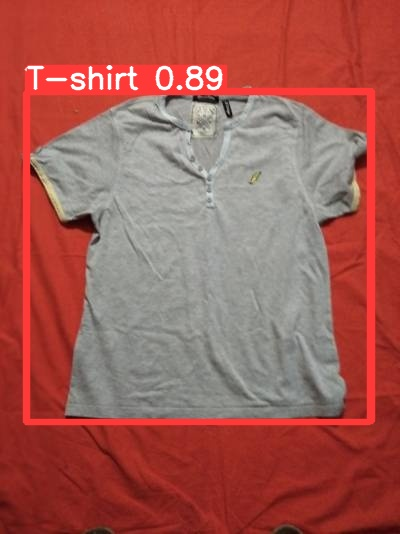

In [12]:
# Detecting t-shirt color(bgr), height, width 

import cv2

def get_tshirt_color(image_path, label_path):
    # read the image
    img = cv2.imread(image_path)

    # read the label file and extract bounding box coordinates
    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            class_id, xmin, ymin, xmax, ymax, score = line.strip().split()
            xmin, ymin, xmax, ymax = int(float(xmin) * img.shape[1]), int(float(ymin) * img.shape[0]), int(float(xmax) * img.shape[1]), int(float(ymax) * img.shape[0])
            tshirt = img[ymin:ymax, xmin:xmax]
            color = cv2.mean(tshirt) 
            color = tuple(map(int, color[:3]))
            width, height = tshirt.shape[:2]
            print("Color displayed in BGR format:", color)
            print("Height of T-shirt:", height)
            print("Width of T-shirt:", width)

image_path = '/home/ave0235/Downloads/Neural Foundry/yolov5/runs/detect/exp9/2cc6e505-1a89-42e0-8177-017118117027.jpg'
label_path = '/home/ave0235/Downloads/Neural Foundry/yolov5/runs/detect/exp9/labels/2cc6e505-1a89-42e0-8177-017118117027.txt'
get_tshirt_color(image_path, label_path)
        
Image(filename='/home/ave0235/Downloads/Neural Foundry/yolov5/runs/detect/exp9/2cc6e505-1a89-42e0-8177-017118117027.jpg', width=500)